In [ ]:
# linear regression is not suitable for classfication problem bcoz whenever outlier is added in data
# since best fit line is sensetive to values it will get deviated with largly 
# this may be wrong classification result hence we don't use linear regression method for best fit line in binary classification 
# in logistic regression we derive best fit line based on cost function 
# cost function = sumation of (yi * (W^t)iXi) # 
# W^t -> weight Transpose same as coeficient of linear equation ((W^t)x + b) ,here intercept is consider as 0 => b
# line where we have max cost value is best fit 
# we find this max cost fun value by updating W^t value
# but this cost function is also sensetive to outlier 
# so we have sigmoid function in it i.e. 1/ (1 + e ^(-z))
# where z = cost function => sum from i=1 to n ((yi * (W^t)i.Xi))
# sigmoid function will transform all (W^t)i.Xi values in 0 to 1 range 

# multiclass OVR
# different models will be created in iteration
# considering one class as positive classification and rest of the class as negative 
# on test data models of different class will give diff probablity values [0.25,0.55,0.20]
# in this class with highest prob will be considered 


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
pf = ProfileReport(df)
pf.to_widgets()

In [6]:
pf.to_file('diabetes_Reprot.html')

In [ ]:
# Data set analysis
# no missing values
# glucose BMI are close to normal distribution 
# some of the features are right/left skewed 
# no corrrelation has >0.9 value so can't say multicollinearity exists
# data set has lot of zero values in some features (may be due to data capturing device error)
# need to update this value with some thing else like avg

In [3]:
df['BMI'] = df['BMI'].replace(0, df.BMI.mean())

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df['BMI'][df['BMI'] == 0].count()

0

In [ ]:

# df['BloodPressure'] = df['BloodPressure'].replace(0, df.BloodPressure.mean())
# df['Insulin'] = df['Insulin'].replace(0, df.Insulin.mean())
# df['Glucose'] = df['Glucose'].replace(0, df.Glucose.mean())
# df['SkinThickness'] = df['SkinThickness'].replace(0, df.SkinThickness.mean())


In [6]:
# alternate way and no need to do for Pregnancies column
rep_cols = ['BloodPressure','Insulin','Glucose','SkinThickness']

for cols in df.columns:
    print(df[cols][df[cols] == 0].count())
    if(cols in rep_cols and df[cols][df[cols] == 0].count() > 0 ):
        df[cols] = df[cols].replace(0, df[cols].mean()) # replacing with mean

111
5
35
227
374
0
0
0
500


In [7]:
for cols in df.columns:
    print(' {} zero count - {}'.format(cols,df[cols][df[cols] == 0].count()))

 Pregnancies zero count - 111
 Glucose zero count - 0
 BloodPressure zero count - 0
 SkinThickness zero count - 0
 Insulin zero count - 0
 BMI zero count - 0
 DiabetesPedigreeFunction zero count - 0
 Age zero count - 0
 Outcome zero count - 500


<AxesSubplot:>

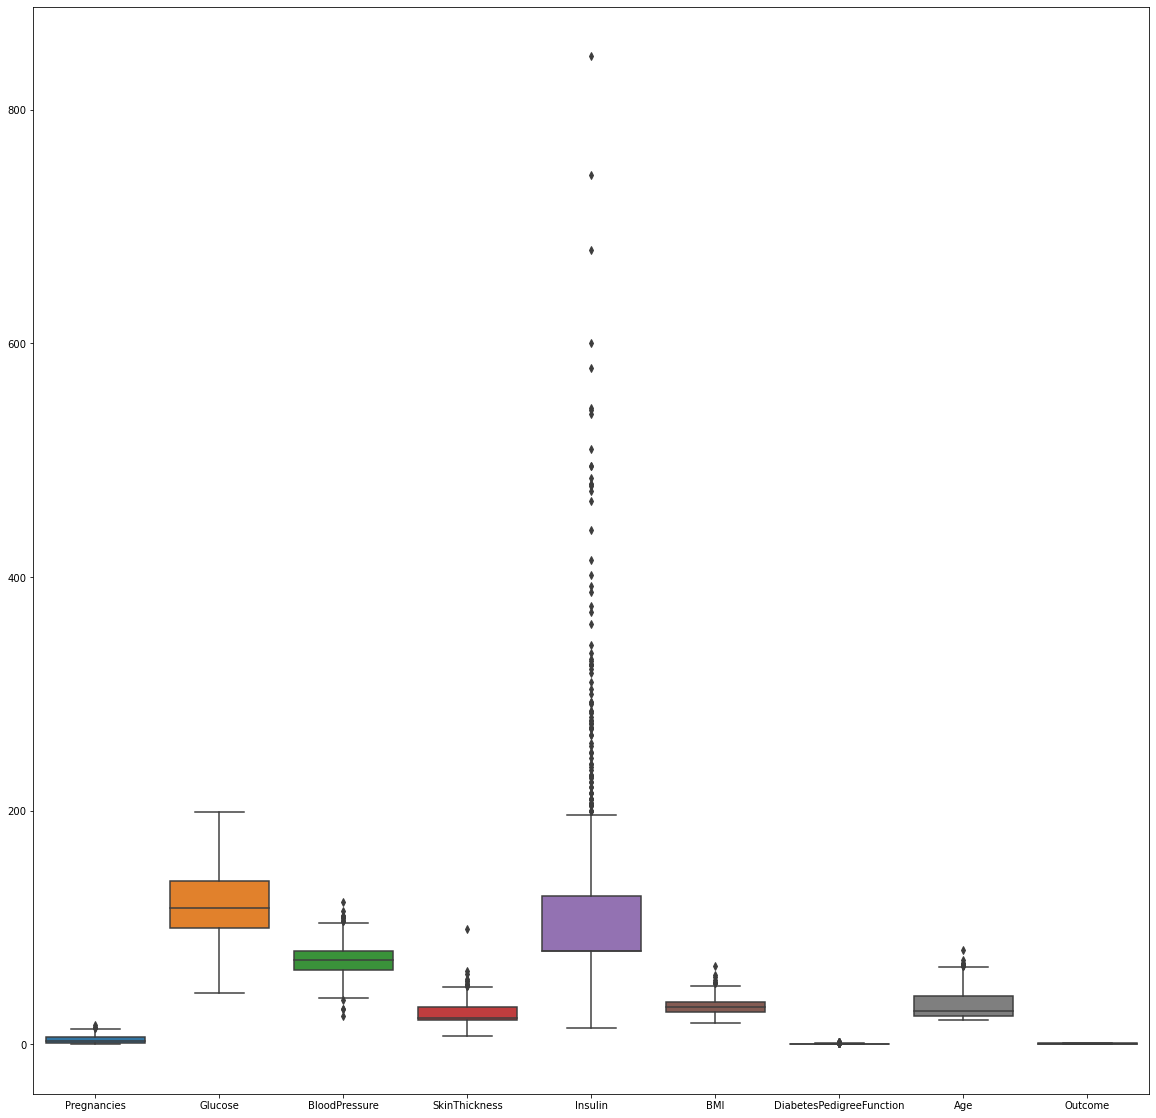

In [8]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax =ax)

In [ ]:
# Insulin having many outliers
# BMI, Age, BloodPressure, SkinThickness having some outliers 
# now to remove outliers as much as possible 
# we can use mulitple techniques like log transformation , quantile range wise outlier reduction

In [9]:
q = df['Insulin'].quantile(.95) # can experiment with different quantile range to see minimum outliers 
q

293.0

In [10]:
df_new = df[df['Insulin'] < q]
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<AxesSubplot:>

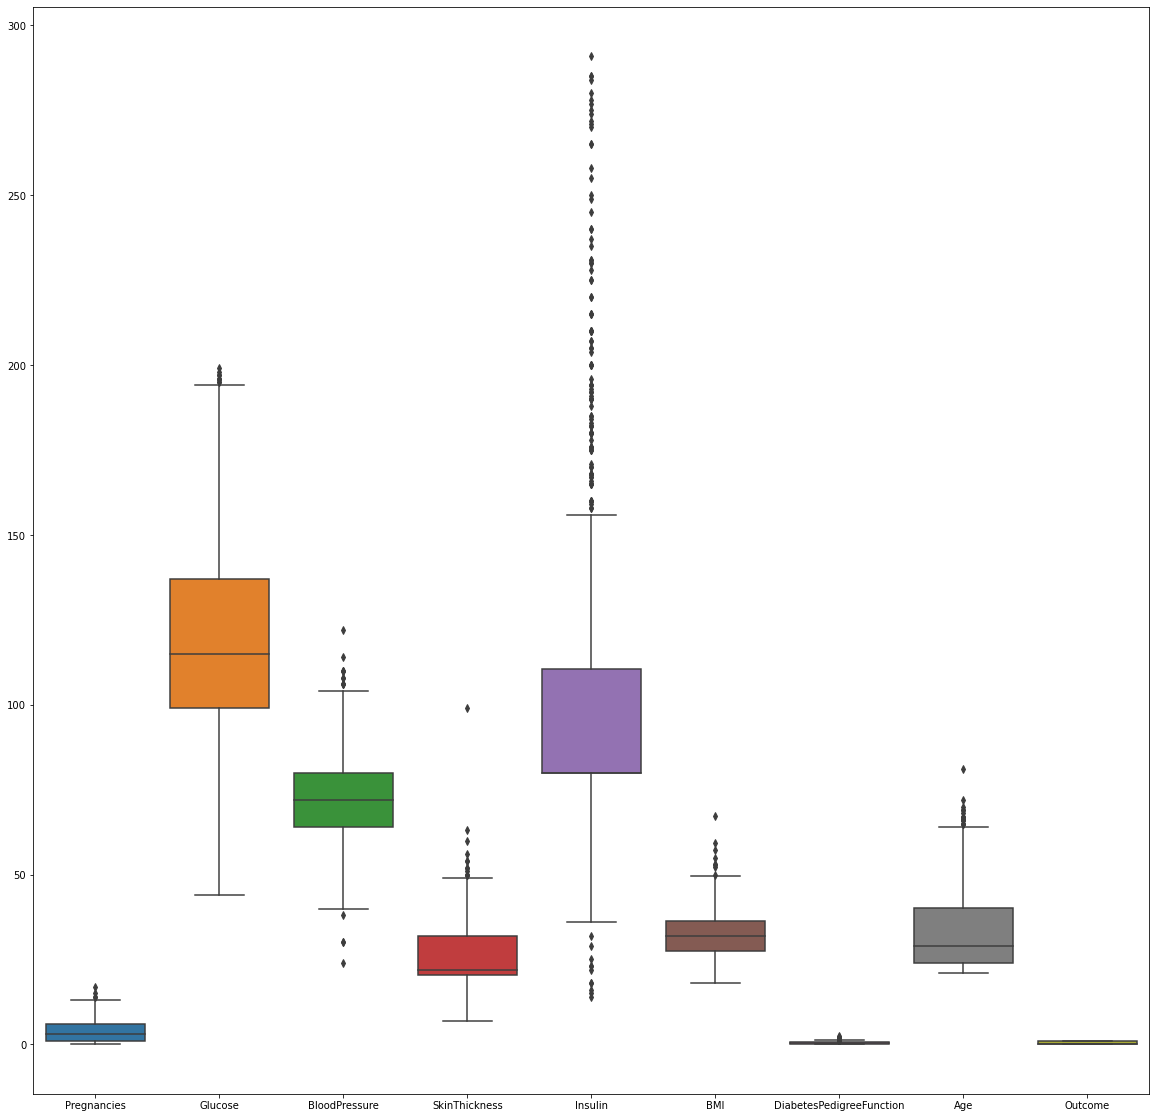

In [11]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax =ax)

<AxesSubplot:>

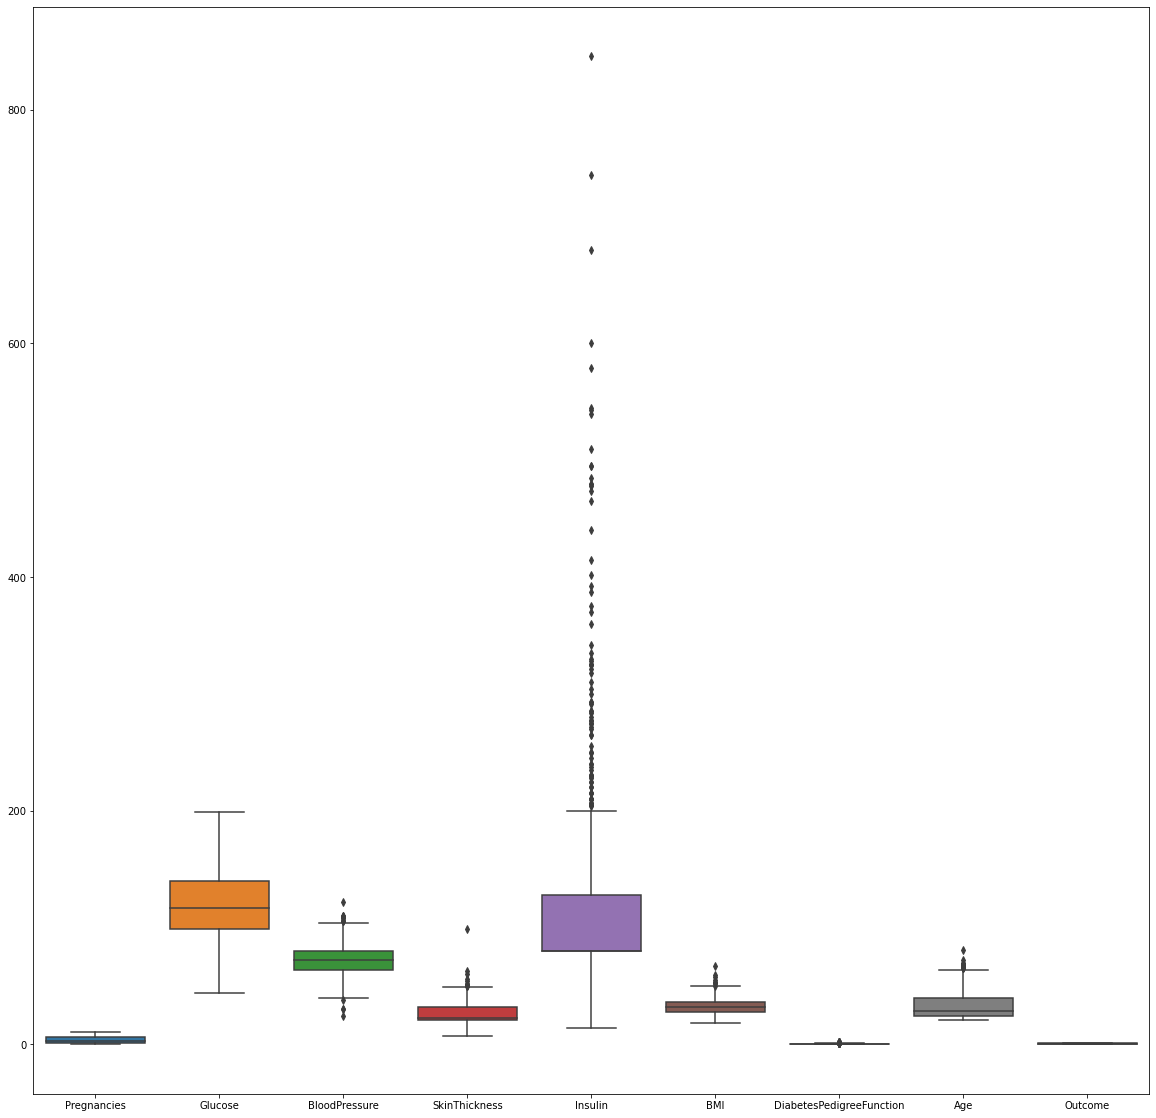

In [12]:
q = df['Pregnancies'].quantile(.98)
df_new = df[df['Pregnancies'] < q]
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax =ax)

<AxesSubplot:>

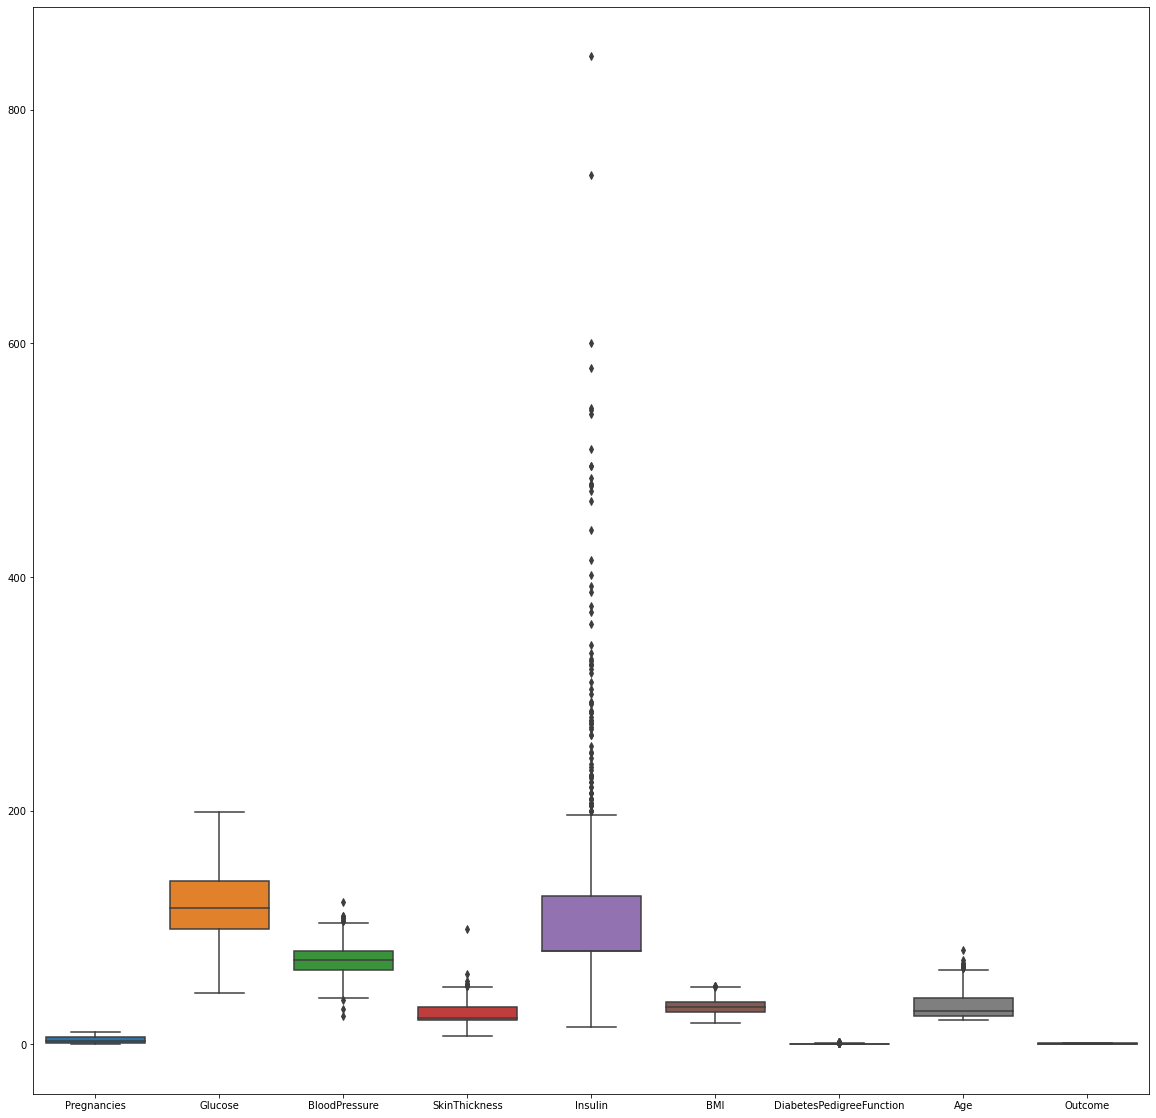

In [13]:
q = df_new['BMI'].quantile(.99)
df_new = df_new[df_new['BMI'] < q]
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax =ax)

<AxesSubplot:>

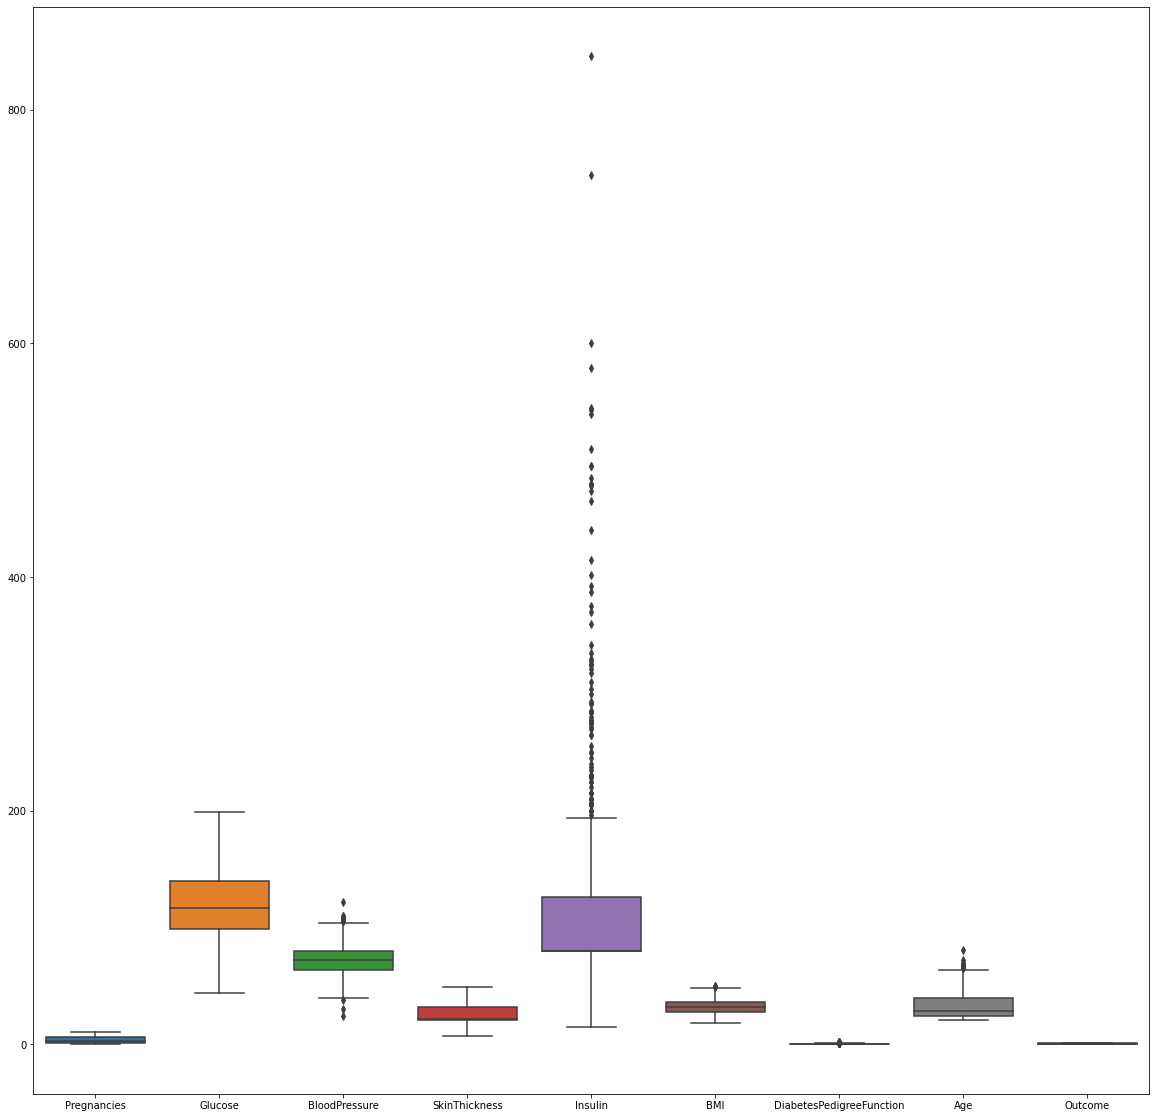

In [14]:
q = df_new['SkinThickness'].quantile(.99)
df_new = df_new[df_new['SkinThickness'] < q]
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax =ax)

<AxesSubplot:>

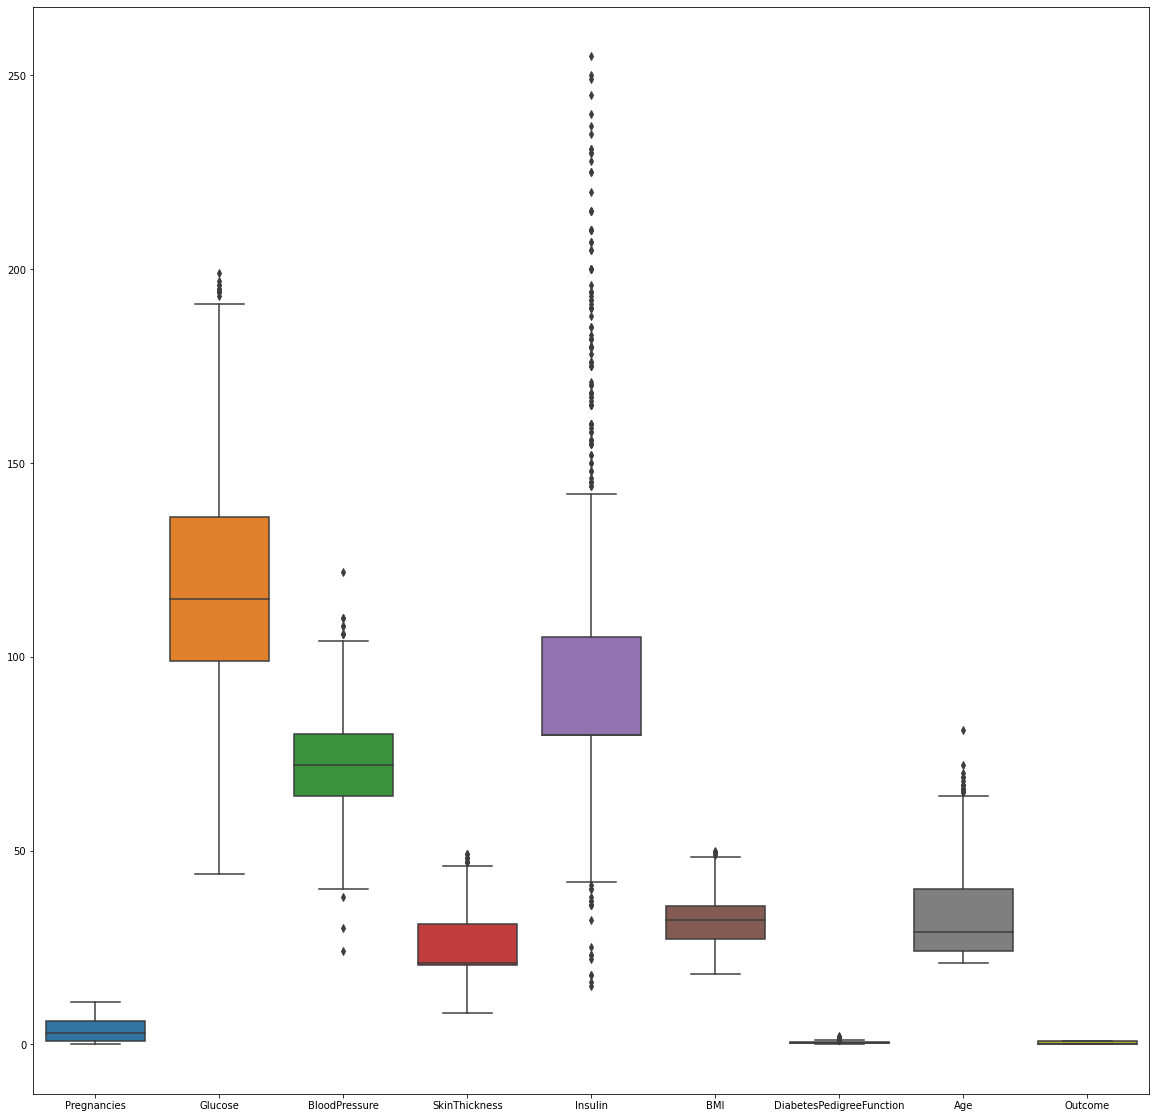

In [34]:
q = df_new['Insulin'].quantile(.95)
df_new = df_new[df_new['Insulin'] < q]
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax =ax)

<AxesSubplot:>

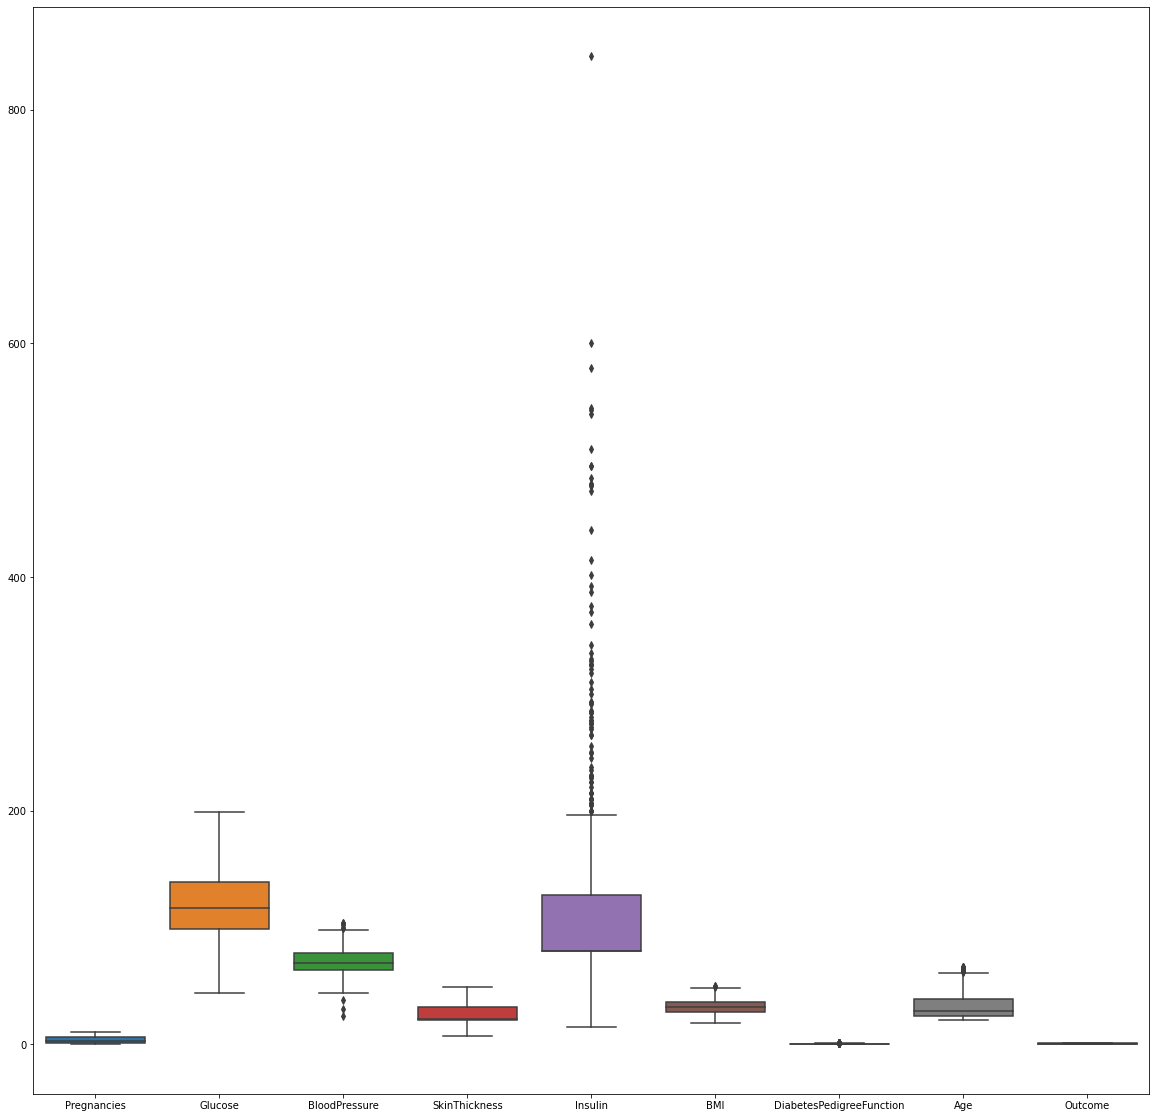

In [15]:
q = df_new['DiabetesPedigreeFunction'].quantile(.99)
df_new = df_new[df_new['DiabetesPedigreeFunction'] < q]

q = df_new['BloodPressure'].quantile(.99)
df_new = df_new[df_new['BloodPressure'] < q]

q = df_new['Age'].quantile(.99)
df_new = df_new[df_new['Age'] < q]

fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax =ax)

In [16]:
df_new.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
pf2 =ProfileReport(df_new)
pf2.to_widgets()

In [ ]:
# still there are skewed columns 
# and for some features data is varying lot means min and max has huge gap 
# so for normalizing this we can use standard scaler to scale data 

In [18]:
y = df_new['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 703, dtype: int64

In [19]:
x = df_new.drop(columns = ['Outcome'])
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [20]:
scalar = StandardScaler()

In [21]:
scalar

StandardScaler()

In [53]:
x_scaledDf = pd.DataFrame(scalar.fit_transform(x))
x_scaledDf

,0,1,2,3,4,5,6,7
0,0.813056,0.898425,0.043682,1.041636,-0.423637,0.257208,0.603329,1.606382
1,-0.866081,-1.201493,-0.489412,0.348353,-0.423637,-0.849513,-0.351482,-0.127332
2,1.484711,2.065046,-0.667111,-0.629584,-0.423637,-1.371253,0.759005,-0.036084
3,-0.866081,-1.068165,-0.489412,-0.344929,-0.264127,-0.612359,-0.988024,-1.039813
4,0.477229,-0.168200,0.221380,-0.629584,-0.423637,-1.007616,-0.870402,-0.218580
...,...,...,...,...,...,...,...,...
698,2.156366,-0.668180,0.399078,2.543748,0.701884,0.146536,-0.974186,2.792608
699,-0.530254,0.031792,-0.134016,0.117259,-0.423637,0.763138,-0.389537,-0.492325
700,0.477229,-0.001540,0.043682,-0.344929,-0.061938,-0.912755,-0.718186,-0.218580
701,-0.866081,0.165120,-1.022507,-0.629584,-0.423637,-0.296153,-0.358401,1.332638


In [54]:
x_scaled = scalar.fit_transform(x)

In [23]:
pf3 = ProfileReport(x_scaledDf)
pf3.to_widgets()

<AxesSubplot:>

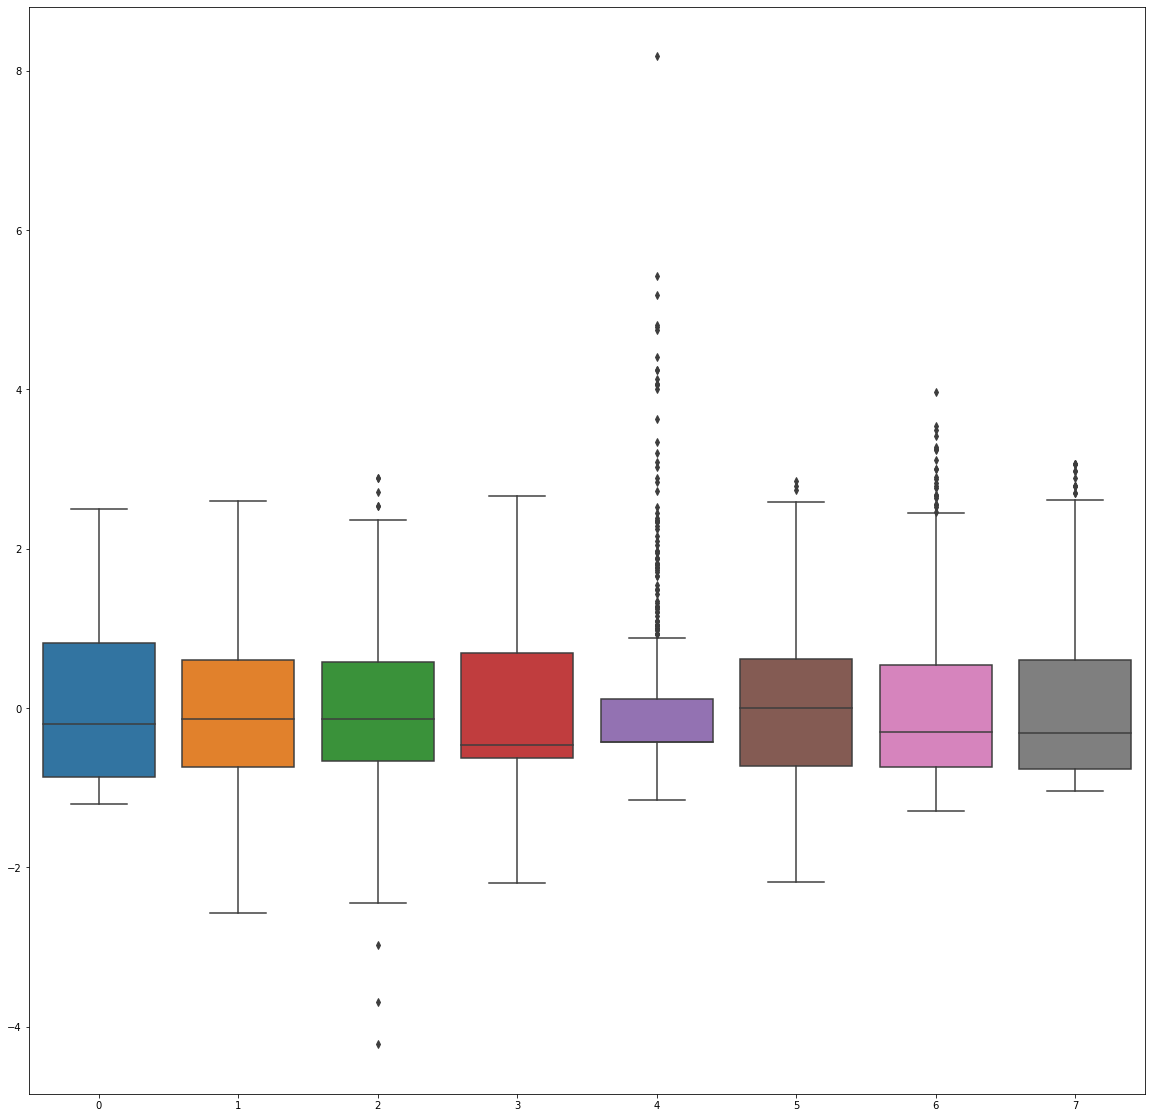

In [55]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = x_scaled , ax =ax)

In [56]:
x_scaled.shape

(703, 8)

In [58]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [59]:
vif_score(x)

,FEATURE,VIF_SCORE
0,Pregnancies,1.445939
1,Glucose,1.365945
2,BloodPressure,1.242474
3,SkinThickness,1.499654
4,Insulin,1.303314
5,BMI,1.544127
6,DiabetesPedigreeFunction,1.030228
7,Age,1.651886


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled , y , test_size = .20 , random_state = 144)

In [61]:
x_train

array([[ 0.14140106, -0.13486777, -0.66711063, ...,  0.19396676,
        -0.77007747, -0.76606891],
       [-0.86608146,  0.09845643, -1.02250695, ...,  0.60503468,
         0.21241005, -1.03981329],
       [ 0.47722856, -1.46814889,  0.93217284, ...,  0.60503468,
        -1.02607773,  0.23766048],
       ...,
       [ 1.82053859,  1.43173755,  1.109871  , ..., -0.18548056,
         1.30905985, -0.0360839 ],
       [-1.20190897,  1.7317258 ,  0.57677651, ...,  2.2967373 ,
         2.44376374,  2.33636739],
       [-1.20190897,  0.33178062, -0.48941246, ...,  0.36788011,
        -0.88769921, -0.94856516]])

In [62]:
x_test

array([[ 1.82053859,  0.63176887,  1.99836182, ...,  0.11491523,
         0.97349193,  1.15014175],
       [-0.86608146,  1.19841335,  0.04368203, ..., -1.00761641,
        -1.14024002, -0.76606891],
       [-1.20190897, -0.63484819,  0.57677651, ...,  0.39950072,
        -0.74240176, -0.76606891],
       ...,
       [-0.86608146, -1.10149658, -0.84480879, ..., -0.3277733 ,
        -0.10586055, -0.85731703],
       [ 0.81305607,  0.09845643,  0.04368203, ..., -0.69141032,
        -0.29267156, -0.30982828],
       [-0.19442645,  1.7317258 ,  0.57677651, ...,  0.28882859,
         1.78992521, -0.12733202]])

In [63]:
logr = LogisticRegression(verbose=1)
#for multiclass set ovr one versus rest 
#logistic regression by default implement regularization thorugh different solvers 
#verbose for logging purpose

In [64]:
logr.fit(x_train,y_train )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [66]:
x_test[0]

array([ 1.82053859,  0.63176887,  1.99836182, -0.62958431, -0.42363672,
        0.11491523,  0.97349193,  1.15014175])

In [67]:
logr.predict_proba([x_test[0]])

array([[0.26650071, 0.73349929]])

In [68]:
logr.predict([x_test[0]])

array([1], dtype=int64)

In [69]:
logr.predict_log_proba([x_test[0]])

array([[-1.32237839, -0.30992864]])

In [70]:
type(y_test)

pandas.core.series.Series

In [72]:
y_test.iloc[0]

1

In [73]:
y_predict = logr.predict(x_test)
y_predict

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [74]:
confusion_matrix(y_test,y_predict)

array([[84,  9],
       [23, 25]], dtype=int64)

In [75]:
lib_logr = LogisticRegression(verbose=1,solver='liblinear')
lib_logr.fit(x_train,y_train )

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [76]:
lib_logr.predict([x_test[0]])

array([1], dtype=int64)

In [77]:
lib_logr.predict([x_test[1]])

array([0], dtype=int64)

In [79]:
y_test.iloc[1]

0

In [80]:
y_libpredict = lib_logr.predict(x_test)
y_libpredict

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [81]:
confusion_matrix(y_test,y_libpredict) # false positive is less here with liblinear

array([[84,  9],
       [23, 25]], dtype=int64)

In [83]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result


In [84]:
model_eval(y_test,y_predict)

{'Accuracy': 0.7730496453900709,
 'Precision': 0.7352941176470589,
 'Recall': 0.5208333333333334,
 'Specficity': 0.9032258064516129,
 'F1': 0.6097560975609756}

In [85]:
model_eval(y_test,y_libpredict) # no difference as per accurracy, Precision, etc

{'Accuracy': 0.7730496453900709,
 'Precision': 0.7352941176470589,
 'Recall': 0.5208333333333334,
 'Specficity': 0.9032258064516129,
 'F1': 0.6097560975609756}

In [86]:
auc = roc_auc_score(y_test,y_libpredict)
auc

0.7120295698924731

In [87]:
roc_auc_score(y_test,y_predict) # again auc is same for both y predicts 

0.7120295698924731

In [88]:
fpr, tpr, thresholds  = roc_curve(y_test,y_libpredict)

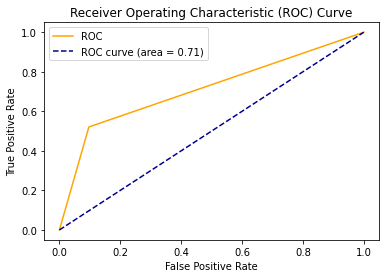

In [89]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [90]:
fpr

array([0.        , 0.09677419, 1.        ])

In [91]:
tpr

array([0.        , 0.52083333, 1.        ])